In [6]:
# Make plots inline
%matplotlib inline

# Make inline plots vector graphics instead of raster graphics
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'svg')

# import modules for plotting and data analysis
import matplotlib.pyplot # as plt
import numpy
import pandas as pd
import seaborn

In [7]:
atlantic_data = pd.read_csv("https://github.com/briandk/NOAA_hurricane_dataset/raw/master/Atlantic.csv")

In [8]:
atlantic_data.columns

Index(['basin', 'name', 'year', 'cyclone_of_the_year', 'num_of_track_entries',
       'date', 'time', 'record_identifier', 'status_of_system', 'latitude',
       'longitude', 'max_sustained_wind', 'central_pressure', '34kt_NE',
       '34kt_SE', '34kt_SW', '34kt_NW', '50kt_NE', '50kt_SE', '50kt_SW',
       '50kt_NW', '64kt_NE', '64kt_SE', '64kt_SW', '64kt_NW'],
      dtype='object')

AL       0
AL     600
AL    1200
AL    1800
AL    2100
Name: date, dtype: int64

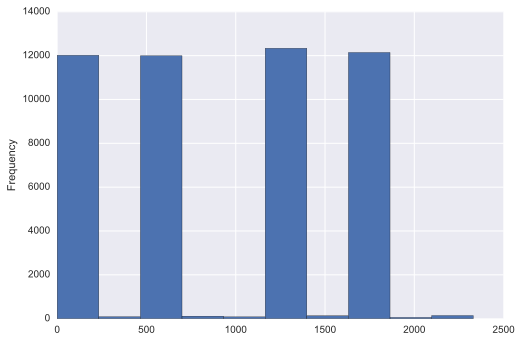

In [13]:
atlantic_data.date.plot.hist(x = 'max_sustained_wind')
atlantic_data.date.head()